<a href="https://colab.research.google.com/github/kotech1/computervision/blob/master/04_neuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀(Linear Regression)

Input: 1개  
Output: 1개  
학습 데이터 수: 2개

In [1]:
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [6]:
x_train = np.array([[0.2], [0.8]]) #2개 입력 데이터
y_train = np.array([[0.3], [0.9]]) #2개 출력 데이터

input_layer = Input((1))
output_layer = Dense(1, activation = None)(input_layer)
model = Model(input_layer, output_layer)

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


모델 컴파일

In [7]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mse'])

학습 전 파라메터 w, b 확인

In [ ]:
model.fit(x_train, y_train, epochs=1000)

In [ ]:
# check weights and prediction
layer = model.layers[1]
weights = layer.get_weights()
print('w = ', weights[0], 'b = ', weights[1]) # w,b
preds = model.predict(x_train)
print(preds)

w =  [[1.1008375]]
b =  [0.04573274]
[[0.26590025]
 [0.92640275]]


# 영상 학습 및 인식
**이미지 읽기**

In [ ]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = (train_images, train_labels), (test_images, test_labels)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
NUM_CLASSES = 10

**데이터 전처리**

In [ ]:
from tensorflow.keras.utils import to_categorical

x_train = x_train/255.
x_test = x_test/255.

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print("converted y.shape = ", y_train.shape)

converted y.shape =  (60000, 10)


**샘플 이미지 출력**

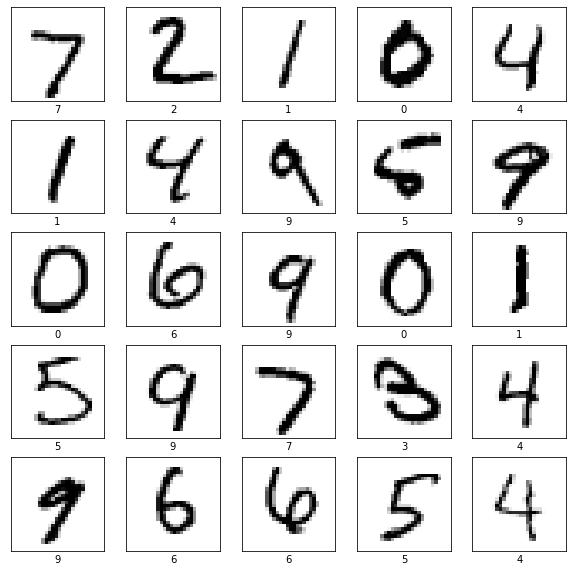

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i].argmax()])
#plt.show()

**모델 만들기**

In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer = Input((28, 28))
x = Flatten()(input_layer)
x = Dense(128, activation = 'relu')(x)
output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)
model = Model(input_layer, output_layer)

In [ ]:
from tensorflow.keras.layers import Flatten, Dense

model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

**모델 요약**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**모델 시각화**

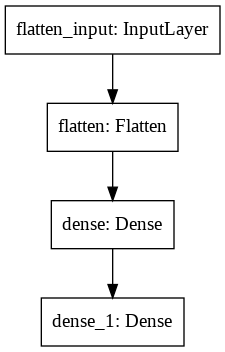

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

**모델 컴파일 및 학습**

In [ ]:
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0340 - accuracy: 0.8312
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0297 - accuracy: 0.8476
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0268 - accuracy: 0.8585
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0248 - accuracy: 0.8662
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0232 - accuracy: 0.8719
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0220 - accuracy: 0.8769
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0210 - accuracy: 0.8806
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0202 - accuracy: 0.8840
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0195 - accuracy: 0.8870
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.018

**모델 평가**

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.8968


In [ ]:
predictions = model.predict(x_test)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

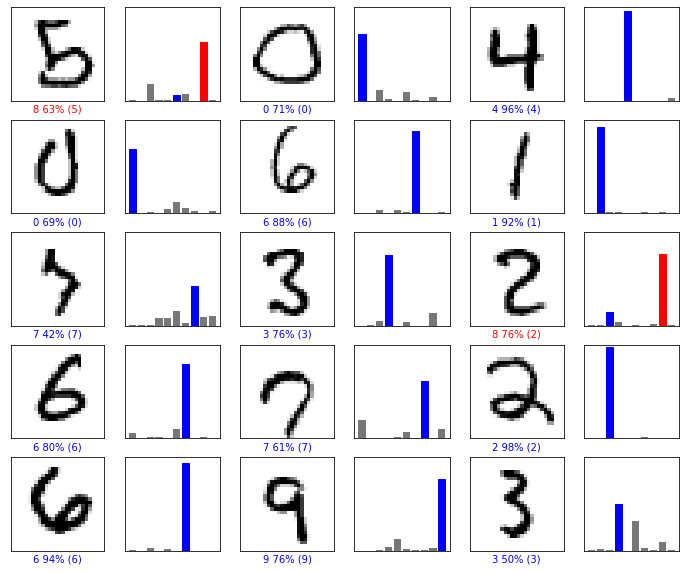

In [ ]:

# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+720, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+720, predictions, test_labels)
plt.show()

In [ ]:
x = np.array([0.2, 0.8])
y = np.array([0.3, 0.9])
w = np.array(-0.1)
b = np.array(0.5)